<a href="https://colab.research.google.com/github/mtzig/LIDC_GDRO/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/mtzig/badwriting_OCR.git
%cd /content/badwriting_OCR/

Cloning into 'badwriting_OCR'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 8 (delta 1), pack-reused 0
Receiving objects: 100% (15/15), 299.48 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/badwriting_OCR


In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

#trocr-small-handwritten



In [3]:
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-handwritten')
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')



Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

In [83]:
def classify_img(img):

  pixel_values = processor(images=img, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values, max_length=10)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

  print(generated_text)


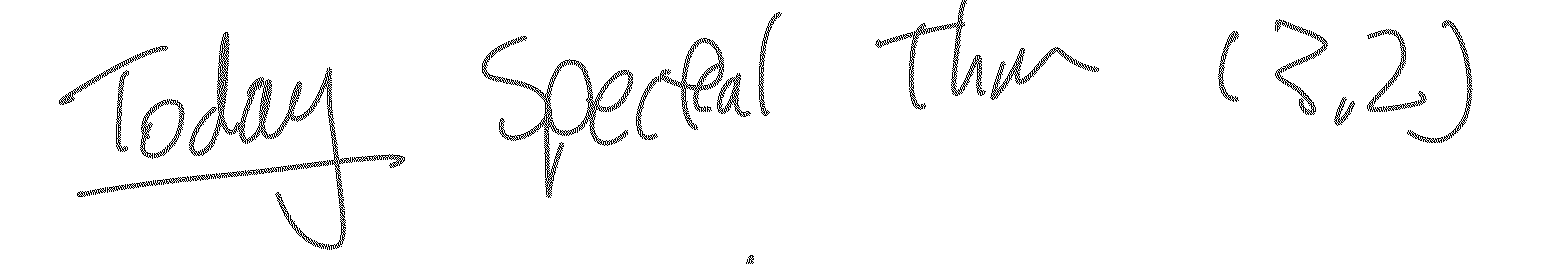

In [76]:
# load image
t_1 = Image.open('data/test_1.png').convert('1').convert("RGB")
t_1



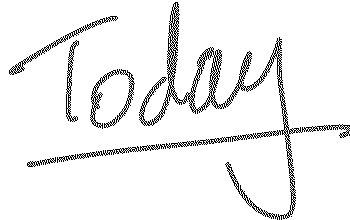

In [79]:
im_today  = t_1.crop((50,30,400,250)) # today
im_today

In [84]:
classify_img(im_today)

" Today


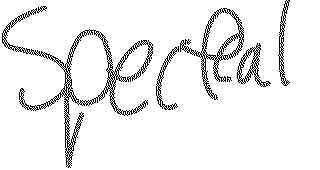

In [85]:
im_spectral = t_1.crop((480,30,800,200))
im_spectral

In [86]:
classify_img(im_spectral)

effect of the local


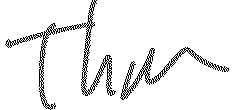

In [100]:
im_thm = t_1.crop((870,0,1120,110))
im_thm

In [101]:
classify_img(im_thm)

# Women
